In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

In [2]:
# Path to the dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/archive (1)'

# Lists to store images and labels
images = []
labels = []

# Loop through each folder (each person)
for person_folder in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person_folder)
    if os.path.isdir(person_path):
        # The label is the person's identifier (e.g., 's1', 's2')
        label = int(person_folder.replace('s', '')) - 1
        # Loop through each image of the person
        for image_file in os.listdir(person_path):
            image_path = os.path.join(person_path, image_file)
            # Read the image in grayscale
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # Resize image to 92x112 as specified
            image = cv2.resize(image, (92, 112))
            images.append(image)
            labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the image data to be between 0 and 1
images = images / 255.0

# Reshape the images for the CNN input
images = images.reshape(-1, 112, 92, 1)

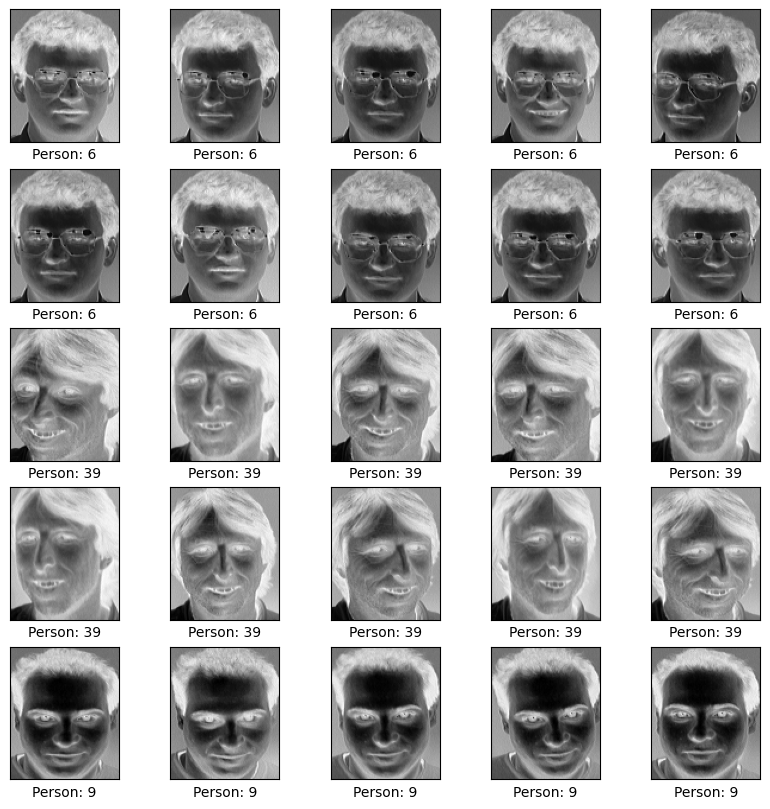

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(112, 92), cmap=plt.cm.binary)
    plt.xlabel(f"Person: {labels[i] + 1}")
plt.show()

In [4]:
# Split data into training and a temporary set (for validation and testing)
x_train, x_temp, y_train, y_temp = train_test_split(
    images, labels, test_size=0.4, random_state=42, stratify=labels)

# Split the temporary set into validation and testing sets
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (240, 112, 92, 1)
Validation data shape: (80, 112, 92, 1)
Testing data shape: (80, 112, 92, 1)


In [5]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [6]:
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(112, 92, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten the results to feed into a dense layer
    Flatten(),

    # Fully Connected Layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(40, activation='softmax')  # 40 classes for 40 people
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 110, 90, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 55, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 53, 43, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 9, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 9, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,078,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │        20,520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,191,592 (27.43 MB)

 Trainable params: 7,191,592 (27.43 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=100,  # Start with 100 and see how it goes
                    validation_data=(x_val, y_val))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.0568 - loss: 3.9391 - val_accuracy: 0.0250 - val_loss: 3.6886
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0268 - loss: 3.6885 - val_accuracy: 0.0250 - val_loss: 3.6883
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0119 - loss: 3.6897 - val_accuracy: 0.0375 - val_loss: 3.6880
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0278 - loss: 3.6894 - val_accuracy: 0.0250 - val_loss: 3.6885
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0420 - loss: 3.6892 - val_accuracy: 0.0250 - val_loss: 3.6878
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.0549 - loss: 3.6885 - val_accuracy: 0.0500 - val_loss: 3.6860
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0481 - loss: 3.6813 - val_accuracy: 0.0375 - val_loss: 3.6824
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0213 - loss: 3.6831 - val_accuracy: 0.0375 - val_loss: 3.6791
Epoch

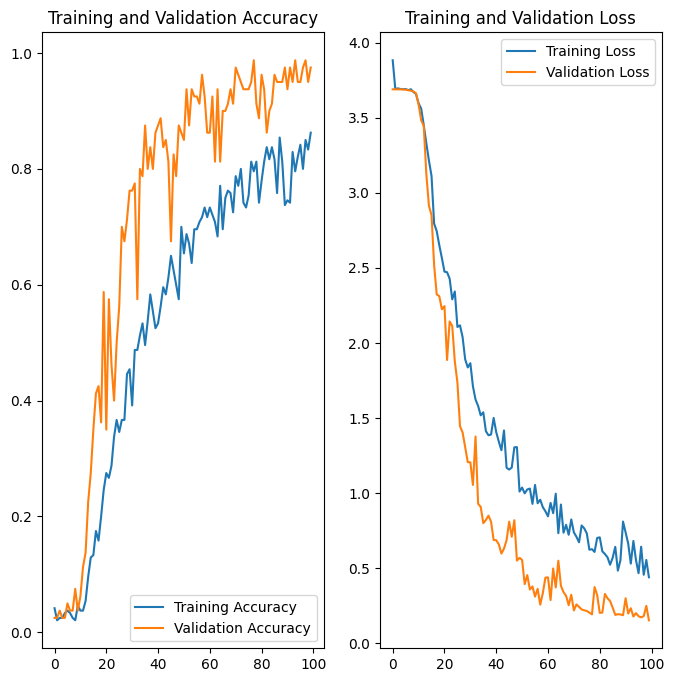

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

3/3 - 0s - 16ms/step - accuracy: 0.9875 - loss: 0.1168

Test accuracy: 0.987500011920929
